# Moving Average (MA) and ARMA Models
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Describe Model
- Mathemetical Description of MA(1) Model
$$ R_t = \mu + \epsilon_t + \theta \epsilon_{t-1} $$
    - Since only one lagged error on right hand side, this is called MA model of order 1, or MA(1) model
- Interpretation of MA(1) Parameter
    - Negative $\theta$: One-Period Mean Reversion
    - Positive $\theta$: One-Period Momentum
    - Note: One-Period autocorrelation is $\frac{\theta}{1+ \theta^2}$, note $\theta$
- High Order MA Models
    - MA(1)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1}$$
    - MA(2)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} $$
    - MA(3)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3}$$
    - $\cdots$

### Simulate MA(1) Time Series
You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the ```arima_process``` module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with $\theta = -0.9$, the array representing the MA parameters would be ```ma = np.array([1, -0.9])```.

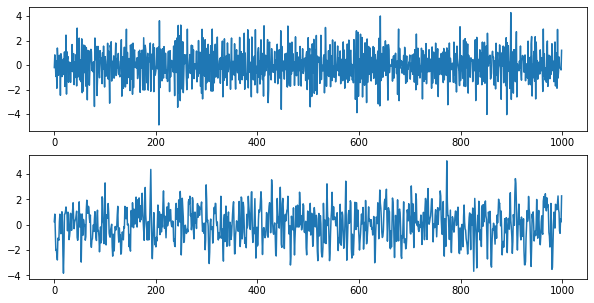

In [22]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: MA parameter: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

### Compute the ACF for Several MA Time Series
Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not $\theta$, but rather $\frac{\theta}{1+\theta^2}$. For example, if the MA parameter, $\theta$, is = +0.9, the first-lag autocorrelation will be $\frac{0.9}{1 + (0.9)^2} = 0.497$, and the autocorrelation at all other lags will be zero. If the MA parameter, $\theta$, is -0.9, the first-lag autocorrelation will be $\frac{-0.9}{1 + (-0.9)^2}$ = -0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

In [23]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

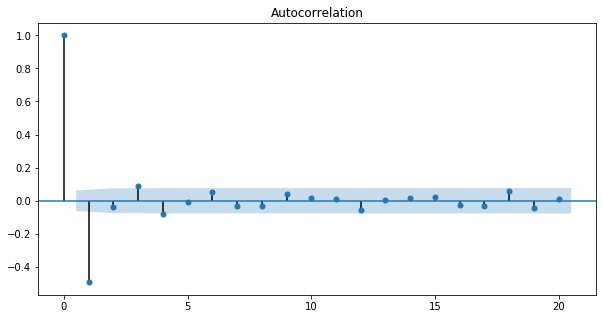

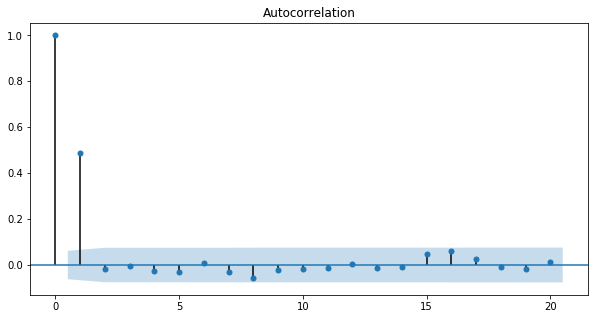

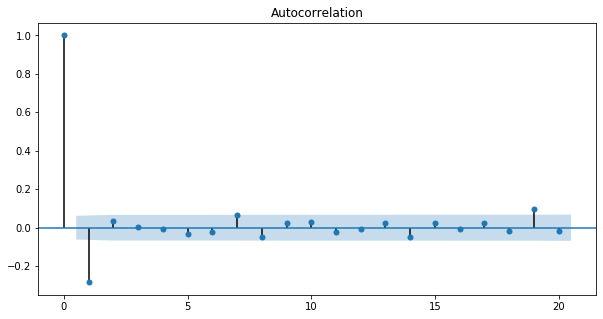

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20);

# Plot 2: MA parameter = +0.9
plot_acf(simulated_data_2, lags=20);

# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20);

## Estimation and Forecasting an MA Model


### Estimating an MA Model
You will estimate the MA(1) parameter, $\theta$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true $\theta$ of -0.9, you will print out the estimate of $\theta$. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

In [25]:
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.974
Method:                       css-mle   S.D. of innovations              0.986
Date:                Mon, 08 Jun 2020   AIC                           2817.948
Time:                        22:50:29   BIC                           2832.672
Sample:                             0   HQIC                          2823.544
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046      0.003     -1.304      0.192      -0.011       0.002
ma.L1.y       -0.8890      0.014    -64.305      0.000      -0.916      -0.862
                                    Roots           

### Forecasting with MA Model
As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series ```simulated_data_1``` with $\theta=−0.9$, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

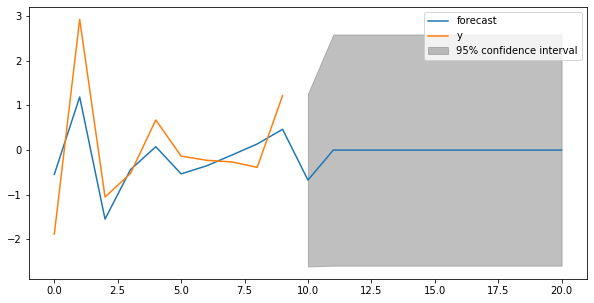

In [26]:
# Forecast the first MA(1) model
res.plot_predict(start=990, end=1010);

## ARMA models
- ARMA(1,1) model:
$$ R_t = \mu + \phi R_{t-1} + \epsilon_t + \theta \epsilon_{t-1} $$
- Converting Between ARMA, AR, and MA Models
    - Converting AR(1) into an MA($\infty$)
$$ \begin{aligned} R_t &= \mu + \phi R_{t-1} + \epsilon_t \\
R_t &= \mu + \phi( \mu + \phi R_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
&\vdots \\
R_t &= \frac{\mu}{1-\phi} + \epsilon_t + \phi \epsilon_{t-1} - \phi^2 \epsilon_{t-2} + \phi^3 \epsilon_{t-3} + \dots \end{aligned} $$

### High Frequency Stock Prices
Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame ```intraday``` contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the ```DATE``` column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see [here](https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market) on how the data was downloaded).

- Preprocess

In [27]:
intraday = pd.read_csv('./dataset/Sprint_Intraday.txt', header=None)
intraday = intraday.loc[:, :1]
intraday.head()

0       1
0  a1504272600  8.2900
1            1  8.2700
2            2  8.2800
3            3  8.2750
4            4  8.2875

In [28]:
# Change the first date to zero
intraday.iloc[0, 0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the 'DATE' column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


### More Data Cleaning: Missing Data
When you print out the length of the DataFrame ```intraday```, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


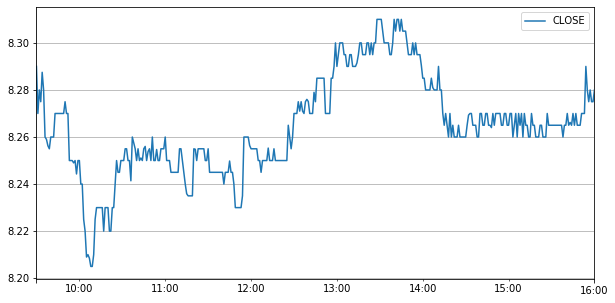

In [29]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True);

### Applying an MA Model
The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in ```intraday```, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


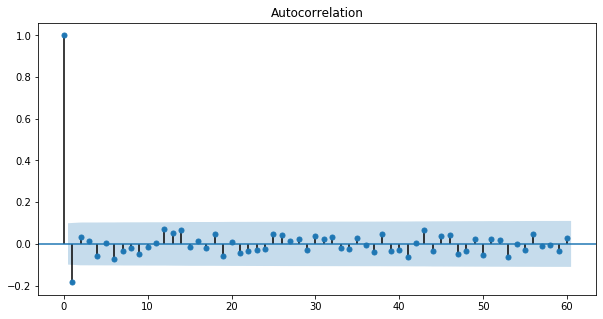

In [30]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60);

# fit the data to an MA(1) model
mod = ARMA(returns, order=(0, 1))
res = mod.fit()
print(res.params)

### Equivalence of AR(1) and MA($\infty$)
To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA($\infty$) model with the appropriate parameters.

You will simulate an MA model with parameters $0.8,0.8^2,0.8^3,\cdots$ for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with $\phi=0.8$.

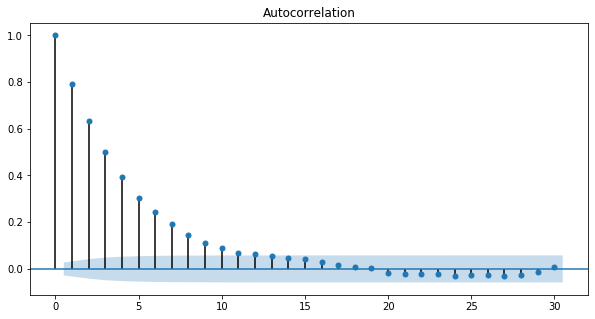

In [31]:
from statsmodels.tsa.arima_process import ArmaProcess

# build a list MA parameters
ma = [0.8 ** i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30);